In this jupyter notebook, we will explain how to solve diffusion equation with the simplest finite difference method (FDM) as the first course! 
 To involve the physics, lets take heat diffusion equation for example:
        $$\rho C_p \frac {\partial T}  {\partial t} =\frac {\partial} {\partial x} (k \frac {\partial T} {\partial x})                   \tag{1} $$              

It can be simplified to: 
        $$ \frac {\partial T}  {\partial t} =\frac {\partial} {\partial x} (D \frac {\partial T} {\partial x})     \tag{2}  $$

Now we can start to do the numerical discretization. One can do it directly on this 2nd partial differential equation,but
here we will split it into two 1st order PDEs.  It is for the conveniance of introducing Pseudo-transient method with dampening in the 2nd lesson. 
        $$ q =- D \frac {\partial T} {\partial x}      \tag{3} $$
        $$ \frac {\partial T}  {\partial t} =-\frac{\partial q} {\partial x}     \tag{4} $$                                            

In fact, these two equations has physical meaning.q is the scaled heat flux ($q_{real}=q * \rho C_p$). 
Physically,q is the flux. Use backward difference for the spatial discretization and forward difference for the temporal 
discretiztion, we have: 
$$ q_i =- D \frac {T_i-T_{i-1}} {\Delta x} \tag{5}  $$
$$ \frac {{T_i}^{t+1}-{T_i}^t}  {\Delta t} =-\frac{{q_i}^t-{q_{i-1}}^t}  {\Delta x} \rightarrow \color {red} {\Delta T_{dt}}  \tag{6}   $$


This leads to:
$${T_i}^{t+1}={T_i}^t+ \Delta t *\color {red}{\Delta T_{dt}} \tag{7} $$


It suggests that we can directly calculate the new T at any location when the old T field is known. 
This way of solve the time-dependent equation, without solving a system of equations,  is called explicit method, and its solution can be called "explicit solution". Comparably, the discretization of Eq.4) can also be written as:

$$ \frac {{T_i}^{t+1}-{T_i}^t}  {\Delta t} =-\frac{{q_i}^{t+1}-{q_{i-1}}^{t+1}}  {\Delta x}  \tag{8}   $$



Now the calcualtion of $T^{t+1}$ requires the $q^{t+1}$, which is also unknown. Using Eq. 5) into Eq.8), a system of equations solving the unknown field $T^{t+1}$ is formed. It can not be directly calcuated like Eq.7), but can be solve with maxtrix operation or iteration method. This way of solving $T^{t+1}$ is called implicit method, and its solution is called implicit method.  
Now we come back to the explicit method and Here is an quick implemenation. 


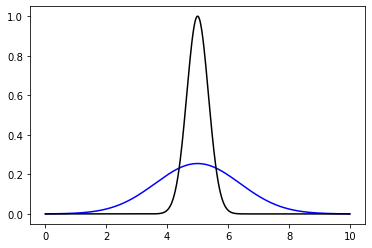

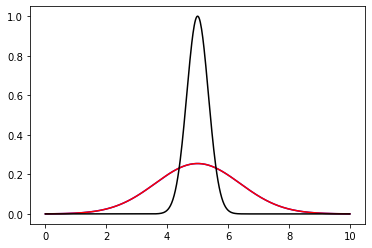

Total 10000 step are calculated.
The physical time is =0.01



In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Lx = 10
D  = 100
tsc = Lx * Lx / D  # charateristic timescale


# Discretization
nx = 250*2  # nx cell
dx = Lx / nx
x  = np.linspace(0, Lx, nx + 1)  #
xc = (x[:-1] + x[1:]) / 2        #xc is at the cell center.  

cnt  = 100
epsi = 1e-4
Imax = 100 * nx # maximu iteration
ndim = 1  # dimension of the code. 1D here!
CFL  = 0.9

dtaudiff = CFL * dx * dx / (2 * D * ndim) # CFL controled dt,which maintain the stability of the explicit scheme!
dt       = dtaudiff * 0.5  # actual dt for time marching. 
# check CFL criterion for the numerical scheme

# Initiation
#You can set your whatever initial condition!
#Here we choose an intial condition that we know the analytical solution （Tana）! Thus we can verify the numerical solution!
T0 = np.zeros(nx)
a  = 0.5 * Lx
t0 = tsc / 1600
T0 = np.exp(-(xc - a) ** 2 / (4 * D * t0))

Told = T0
T = T0.copy()  # .copy is needed for python. Otherwise T0 and T would be the different name of the same array
f = np.sin(xc) # one can setup the heat generation/sink item. Let it be 0 first!
f[:] = 0

# Boundary condition # Fixed T at boundary here!
dTdt = np.zeros(nx - 2)

time = 0
ttol = 1 * tsc  # 0.1 * tsc

it = 0
plt.show()
while time < ttol * 0.999 and it < 10000:
    q = -D * np.diff(T) / dx
    dTdt = (-np.diff(q) / dx + f[1:-1])
    T[1:-1] = T[1:-1] + dt * dTdt

    it = it + 1
    time = time + dt
    Told = T
    if it % 100 == 0:
        #print(it)
        plt.clf()
        plt.plot(xc, T, 'b', xc, T0, 'k');


#Tana = 1 / np.sqrt(4 * (ttol + 1 / 4)) * np.exp(-(xc - a) ** 2 / (4 * D * (ttol + 1 / 4)))
Tana = np.sqrt(t0 / (t0 + time)) * np.exp(-(xc - a) ** 2 / (4 * D * (t0 + time)))
plt.figure()
plt.plot(xc, T, 'b', xc, Tana, 'r', xc, T0, 'k')
plt.show()

print('Total %d step are calculated.\nThe physical time is =%4.2f\n' % (it, time))




As we can tested with this code, the explicit method can match with the analytical solution very well when suitable dx and dt are used. 
But for certain reason, the implicit solution is commonly used, which will be solved in the 2nd course.
One thing that is worthy be noticed here is that the time derivative in Eq.2) will finnally diminishing over time through this physial process

What I presented here involves only simple mathmatics and physics ,one shall have little problem to read through it. This is a simple explicit solution for diffusion problem. It is so intuitive that it does not involve any coefficents matrix assembly.It may be a naive solution for this problem, but it really explain the idea of pseudo transient method! Imagine every PDE can be used like this!!! 

      Even though it is simple, one can only really get it when you play with it with your own hand and computer code!
Here are a few excercises to do: 

1. try different dt. See when the solution became unstable! Why? check CFL and why it is important!

2. Remove the analytical solution parts (as it may not apply) and try:
  a. difference initial condition T.
  b. play with boundary condition.
  
3. Solve this heat conduction problem by modifying the code: how would the temperature of a low temperature stick evolve when it is got heaten at the two boundry.
